**Importing the Dependencies**

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [152]:
data = pd.read_csv('/content/H-1B_Disclosure_Data_FY2019.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,13,14,20,22,26,27,28,31,32,33,34,35,36,37,38,39,42,43,45,46,47,48,53,54,57,58,59,61,64,66,67,68,69,70,71,72,73,76,78,79,80,82,85,87,88,89,90,91,92,93,94,97,98,99,100,101,103,106,108,109,110,111,112,113,114,115,121,122,124,127,129,130,131,132,133,134,135,136,142,143,145,148,150,151,152,153,154,155,156,157,160,162,164,166,169,171,172,173,174,175,176,177,178,185,187,190,192,193,194,195,196,197,198,199,206,208,211,213,214,215,216,217,218,219,220,223,225,227,229,232,234,235,236,237,238,239,240,244,246,248,250,253,257,258,259) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,PERIOD_OF_EMPLOYMENT_START_DATE,PERIOD_OF_EMPLOYMENT_END_DATE,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,NAICS_CODE,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME,AGENT_ATTORNEY_ADDRESS1,AGENT_ATTORNEY_ADDRESS2,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,AGENT_ATTORNEY_POSTAL_CODE,AGENT_ATTORNEY_COUNTRY,AGENT_ATTORNEY_PROVINCE,...,WORKSITE_POSTAL_CODE_9,WAGE_RATE_OF_PAY_FROM_9,WAGE_RATE_OF_PAY_TO_9,WAGE_UNIT_OF_PAY_9,PREVAILING_WAGE_9,PW_UNIT_OF_PAY_9,PW_TRACKING_NUMBER_9,PW_WAGE_LEVEL_9,PW_OES_YEAR_9,PW_OTHER_SOURCE_9,PW_NON-OES_YEAR_9,PW_SURVEY_PUBLISHER_9,PW_SURVEY_NAME_9,WORKSITE_WORKERS_10,SECONDARY_ENTITY_10,SECONDARY_ENTITY_BUSINESS_NAME_10,WORKSITE_ADDRESS1_10,WORKSITE_ADDRESS2_10,WORKSITE_CITY_10,WORKSITE_COUNTY_10,WORKSITE_STATE_10,WORKSITE_POSTAL_CODE_10,WAGE_RATE_OF_PAY_FROM_10,WAGE_RATE_OF_PAY_TO_10,WAGE_UNIT_OF_PAY_10,PREVAILING_WAGE_10,PW_UNIT_OF_PAY_10,PW_TRACKING_NUMBER_10,PW_WAGE_LEVEL_10,PW_OES_YEAR_10,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,08-04-2016,30-04-2019,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,01-10-2016,30-09-2019,1.0,0,1,0,0.0,0,0,"R/GA MEDIA GROUP, INC.",NaN,450 WEST 33RD STREET,NaN,NEW YORK,NY,10001,NaN,NaN,NaN,NaN,541810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,14-07-2017,13-05-2019,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,01-10-2017,01-10-2019,1.0,0,1,0,0.0,0,0,MOTHER INDUSTRIES LLC,NaN,595 11TH AVENUE,NaN,NEW YORK,NY,10036,NaN,NaN,NaN,NaN,541810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,23-08-2017,30-04-2019,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,11-09-2017,11-09-2019,1.0,0,0,1,0.0,0,0,"WE ARE UNLIMITED, INC.",NaN,"225 NORTH MICHIGAN AVENUE, 21ST FLOOR",NaN,CHICAGO,IL,60601,NaN,NaN,NaN,NaN,541810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,22-12-2017,20-08-2019,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,08-01-2018,07-01-2020,1.0,0,0,1,0.0,0,0,"HELLO ELEPHANT, LLC",NaN,45 MAIN STREET,NaN,BROOKLYN,NY,11201,NaN,NaN,NaN,NaN,541810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,10-01-2018,15-04-2019,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,01-02-2018,01-02-2020,1.0,0,0,1,0.0,0,0,"HELLO ELEPHANT, LLC",NaN,45 MAIN STREET,NaN,BROOKLYN,NY,11201,NaN,NaN,NaN,NaN,541810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Info About DataFrame & No of Entries (rows)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346740 entries, 0 to 346739
Columns: 260 entries, CASE_NUMBER to PUBLIC_DISCLOSURE
dtypes: float64(87), int64(3), object(170)
memory usage: 687.8+ MB


In [154]:
data.dtypes

CASE_NUMBER           object
CASE_STATUS           object
CASE_SUBMITTED        object
DECISION_DATE         object
ORIGINAL_CERT_DATE    object
                       ...  
WILLFUL_VIOLATOR      object
SUPPORT_H1B           object
STATUTORY_BASIS       object
MASTERS_EXEMPTION     object
PUBLIC_DISCLOSURE     object
Length: 260, dtype: object

In [155]:
data.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE',
       'ORIGINAL_CERT_DATE', 'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE',
       'SOC_TITLE', 'FULL_TIME_POSITION',
       ...
       'PW_OTHER_SOURCE_10', 'PW_NON-OES_YEAR_10', 'PW_SURVEY_PUBLISHER_10',
       'PW_SURVEY_NAME_10', 'H-1B_DEPENDENT', 'WILLFUL_VIOLATOR',
       'SUPPORT_H1B', 'STATUTORY_BASIS', 'MASTERS_EXEMPTION',
       'PUBLIC_DISCLOSURE'],
      dtype='object', length=260)

Unique Keys in CASE_STATUS Feature

In [156]:
data.CASE_STATUS.unique()

array(['WITHDRAWN', 'CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED'],
      dtype=object)

No of Rows and Columns

In [157]:
data.shape

(346740, 260)

No of Null Values in Particular Features

In [158]:
data.isnull().sum()

CASE_NUMBER                0
CASE_STATUS                0
CASE_SUBMITTED             0
DECISION_DATE              0
ORIGINAL_CERT_DATE    323314
                       ...  
WILLFUL_VIOLATOR        8406
SUPPORT_H1B           198425
STATUTORY_BASIS       220347
MASTERS_EXEMPTION     346022
PUBLIC_DISCLOSURE      18556
Length: 260, dtype: int64

Creating New DataFrame According to Our Need 

In [159]:
data_final = data[['CASE_STATUS', 'VISA_CLASS', 'EMPLOYER_NAME', 'AGENT_REPRESENTING_EMPLOYER', 'JOB_TITLE', 'SOC_TITLE',
                  'SOC_CODE', 'NAICS_CODE', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
                  'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B', 'WILLFUL_VIOLATOR']]

In [160]:
data_final.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR
0,WITHDRAWN,H-1B,"R/GA MEDIA GROUP, INC.",NaN,ASSOCIATE CREATIVE DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,1,0,0.0,0,0,N,NaN,N
1,WITHDRAWN,E-3 Australian,MOTHER INDUSTRIES LLC,NaN,ACCOUNT SUPERVISOR (MOTHER),ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,1,0,0.0,0,0,NaN,NaN,NaN
2,WITHDRAWN,E-3 Australian,"WE ARE UNLIMITED, INC.",NaN,EXECUTIVE CREATIVE DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,0,1,0.0,0,0,NaN,NaN,NaN
3,WITHDRAWN,E-3 Australian,"HELLO ELEPHANT, LLC",NaN,PROJECT MANAGEMENT LEAD,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,0,1,0.0,0,0,NaN,NaN,NaN
4,WITHDRAWN,E-3 Australian,"HELLO ELEPHANT, LLC",NaN,"CREATIVE DIRECTOR, UX",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,0,1,0.0,0,0,NaN,NaN,NaN


In [161]:
columns = ['CASE_NUMBER', 'VISA_CLASS', 'EMPLOYER_NAME', 'AGENT_REPRESENTING_EMPLOYER', 'JOB_TITLE', 'SOC_TITLE',
                  'SOC_CODE', 'NAICS_CODE', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
                  'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B', 'WILLFUL_VIOLATOR']

len(columns)

16

In [162]:
import seaborn as sns

Heatmap for Analyzing the Correlation b/w Different Numeric Features

Text(0.5, 1.0, 'Multi-Relations b/w Different Features')

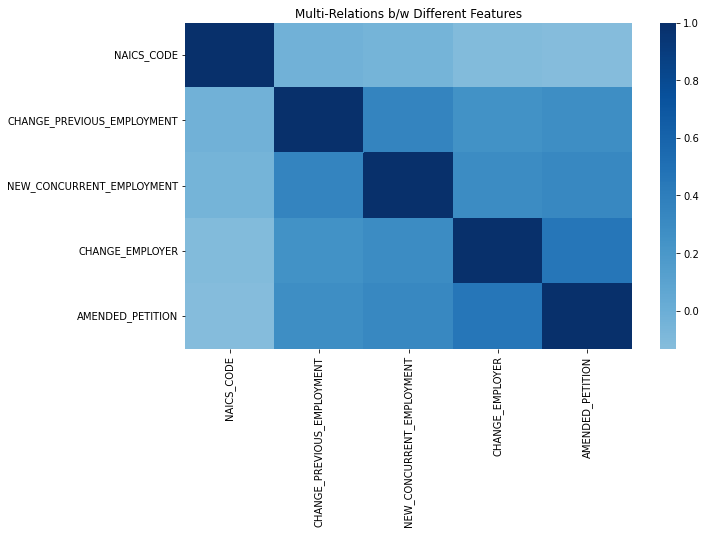

In [163]:
fig, heat = plt.subplots(figsize=(10,6))
sns.heatmap(data_final.corr(), center=0, cmap= 'Blues')
heat.set_title('Multi-Relations b/w Different Features')

Percentage of Null Values in Particular Features in Sorted Order

In [164]:
(data_final.isnull().sum() / data_final.shape[0]).sort_values()

CASE_STATUS                    0.000000
VISA_CLASS                     0.000000
JOB_TITLE                      0.000000
SOC_TITLE                      0.000000
SOC_CODE                       0.000000
CONTINUED_EMPLOYMENT           0.000000
CHANGE_PREVIOUS_EMPLOYMENT     0.000000
CHANGE_EMPLOYER                0.000000
AMENDED_PETITION               0.000000
NAICS_CODE                     0.000003
NEW_CONCURRENT_EMPLOYMENT      0.000003
EMPLOYER_NAME                  0.000017
H-1B_DEPENDENT                 0.024234
WILLFUL_VIOLATOR               0.024243
AGENT_REPRESENTING_EMPLOYER    0.044019
SUPPORT_H1B                    0.572259
dtype: float64

♦ The dataset contains features that gives information about **employer** and **visa applicant**. Out of all the features, We selected below:

♦ Also included very important column named **"CASE_STATUS"** which represent output, *Certified decision is considered as 1 outcome and Denied as 0.*

♦ **`Features:`**

1. CASE_STATUS: Certified decision is considered as 1 outcome in the resulting 
dataset and Denied as 0. This is used to model the outcome. 
2. VISA_CLASS: Only H1-B visa class is being modeled in this paper which contributes to the majority of datapoints, we exclude the 
records for other work visas such as E-3 Australian, H-1B1 Chile and H-1B1 Singapore. 
3. EMPLOYER_NAME: The employer name submitting the visa application.
4. SECONDARY_ENTITY: Whether the applicant will be places in a secondary location.
5. AGENT_REPRESENTING_EMPLOYER: If another firm is representing the employer and its application.
6. JOB_TITLE, SOC_NAME: Job title and SOC name have details about the position, occupation field and seniority of the applicant.
7. SOC_CODE, NAICS_CODE: They are standard categories of a job. 
8. CONTINUED_EMPLOYMENT: If this is a re-new visa application 
9. CHANGE_PREVIOUS_EMPLOYMENT: If an application will continue without changes in job duties
10. NEW_CONCURRENT_EMPLOYMENT: If the applicant will have an additional employer
11. CHANGE_EMPLOYER: If applicant will get the visa with a new employer 
12. AMENDED_PETITION: If an applicant will work with the same employer with changes in duties FULL_TIME_POSITION: If this 
application is for full-time position 
13. H-1B_DEPENDENT: If an employer is categorized to be H1-B dependent. 
14. SUPPORT_H1B: If this application will be used in the future to file for H1-B petitions
15. WILLFUL_VIOLATOR: If an employer has violated H1-B rules in the past. 
16. WAGE_RATE_OF_PAY_FROM: Employer’s proposed wage rate 
17. WAGE_UNIT_OF_PAY: Paycheck frequency.
18. TOTAL_WORKER: Total amount of workers in the company filing the application. 





Unique Categorical Key Values in VISA_CLASS Feature

In [165]:
data_final.VISA_CLASS.unique()

array(['H-1B', 'E-3 Australian', 'H-1B1 Singapore', 'H-1B1 Chile'],
      dtype=object)

Collecting Index No of WITHDRAWN & CERTIFIED-WITHDRAWN Values in the Dataset to Remove From the Dataset

In [166]:
count = 0
flag = 0
withdrawn_index = []

for i in data_final['CASE_STATUS']:
  if i == "WITHDRAWN":
    count += 1
    withdrawn_index.append(flag)
  flag += 1

print(count)
len(withdrawn_index)

11288


11288

In [167]:
count = 0
flag = 0
certified_withdrawn_index = []

for i in data_final['CASE_STATUS']:
  if i == "CERTIFIED-WITHDRAWN":
    count += 1
    certified_withdrawn_index.append(flag)
  flag =+ 1

print(count)
len(certified_withdrawn_index)

23426


23426

Analysing the No of Count We Have for CERTIFIED, DENIED, H-1B, E-3 Australian, H-1B1 Singapore & H-1B1 Chile Values in the Dataset

In [168]:
count = 0

for i in data_final['CASE_STATUS']:
  if i == "CERTIFIED":
    count += 1

count

309238

In [169]:
count = 0

for i in data_final['CASE_STATUS']:
  if i == "DENIED":
    count += 1

count

2788

In [170]:
count = 0

for i in data_final['VISA_CLASS']:
  if i == "H-1B":
    count += 1

count

338095

In [171]:
count = 0

for i in data_final['VISA_CLASS']:
  if i == "E-3 Australian":
    count += 1

count

7424

In [172]:
count = 0

for i in data_final['VISA_CLASS']:
  if i == "H-1B1 Singapore":
    count += 1

count

701

In [173]:
count = 0

for i in data_final['VISA_CLASS']:
  if i == "H-1B1 Chile":
    count += 1

count

520

In [174]:
withdrawn_plus_certified_index = withdrawn_index + certified_withdrawn_index
print(len(withdrawn_plus_certified_index), (len(withdrawn_index) + len(certified_withdrawn_index)))

34714 34714


Removing the Collected Index from Rows as We Don't Need 

In [175]:
dummy = data_final.drop(withdrawn_plus_certified_index, axis=0)

dummy.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR
16,CERTIFIED-WITHDRAWN,E-3 Australian,"HUGE, LLC",NaN,ASSOCIATE EXPERIENCE DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,0,0,0.0,0,0,NaN,NaN,NaN
17,CERTIFIED-WITHDRAWN,E-3 Australian,"R/GA MEDIA GROUP, INC.",NaN,ASSOCIATE CREATIVE DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,1,0,0.0,0,0,NaN,NaN,NaN
18,CERTIFIED-WITHDRAWN,H-1B,FIGLIULO & PARTNERS LLC,NaN,"EXECUTIVE DIRECTOR, STRATEGY",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,0,1,0.0,0,0,N,NaN,N
19,CERTIFIED-WITHDRAWN,H-1B,INVISIONAPP INC.,NaN,PROJECT OPERATIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541511.0,0,0,0.0,0,0,N,NaN,N
20,CERTIFIED-WITHDRAWN,E-3 Australian,"GOODBY, SILVERSTEIN AND PARTNERS, INC.",NaN,ACCOUNT DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,1,0,0.0,0,0,NaN,NaN,NaN


In [176]:
modified_data = dummy

modified_data

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR
16,CERTIFIED-WITHDRAWN,E-3 Australian,"HUGE, LLC",NaN,ASSOCIATE EXPERIENCE DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,0,0,0.0,0,0,NaN,NaN,NaN
17,CERTIFIED-WITHDRAWN,E-3 Australian,"R/GA MEDIA GROUP, INC.",NaN,ASSOCIATE CREATIVE DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,1,0,0.0,0,0,NaN,NaN,NaN
18,CERTIFIED-WITHDRAWN,H-1B,FIGLIULO & PARTNERS LLC,NaN,"EXECUTIVE DIRECTOR, STRATEGY",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,0,1,0.0,0,0,N,NaN,N
19,CERTIFIED-WITHDRAWN,H-1B,INVISIONAPP INC.,NaN,PROJECT OPERATIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541511.0,0,0,0.0,0,0,N,NaN,N
20,CERTIFIED-WITHDRAWN,E-3 Australian,"GOODBY, SILVERSTEIN AND PARTNERS, INC.",NaN,ACCOUNT DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,1,0,0.0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346735,CERTIFIED,H-1B,"AMAZON.COM SERVICES, INC.",Y,SOFTWARE DEVELOPMENT ENGINEER I,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,454111.0,0,0,0.0,1,0,N,NaN,N
346736,CERTIFIED,H-1B,"AMAZON.COM SERVICES, INC.",Y,SOFTWARE DEVELOPMENT ENGINEER I,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,454111.0,0,0,0.0,1,0,N,NaN,N
346737,CERTIFIED,H-1B,A100 US LLC,Y,SOFTWARE DEVELOPMENT ENGINEER II,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,518210.0,0,0,0.0,1,0,N,NaN,N
346738,CERTIFIED,H-1B,"AMAZON.COM SERVICES, INC.",Y,SOFTWARE DEVELOPMENT ENGINEER I,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,454111.0,0,0,0.0,1,0,N,NaN,N


Now Modified Data is out New Dataset After Several Changes

In [177]:
modified_data.isnull().sum() / modified_data.shape[0]

CASE_STATUS                    0.000000
VISA_CLASS                     0.000000
EMPLOYER_NAME                  0.000015
AGENT_REPRESENTING_EMPLOYER    0.040307
JOB_TITLE                      0.000000
SOC_TITLE                      0.000000
SOC_CODE                       0.000000
NAICS_CODE                     0.000003
CONTINUED_EMPLOYMENT           0.000000
CHANGE_PREVIOUS_EMPLOYMENT     0.000000
NEW_CONCURRENT_EMPLOYMENT      0.000003
CHANGE_EMPLOYER                0.000000
AMENDED_PETITION               0.000000
H-1B_DEPENDENT                 0.024269
SUPPORT_H1B                    0.570082
WILLFUL_VIOLATOR               0.024278
dtype: float64

In [178]:
modified_data.isnull().sum()

CASE_STATUS                         0
VISA_CLASS                          0
EMPLOYER_NAME                       5
AGENT_REPRESENTING_EMPLOYER     13521
JOB_TITLE                           0
SOC_TITLE                           0
SOC_CODE                            0
NAICS_CODE                          1
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           1
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
H-1B_DEPENDENT                   8141
SUPPORT_H1B                    191235
WILLFUL_VIOLATOR                 8144
dtype: int64

In [179]:
#count = 0

#for i in modified_data['CASE_STATUS']:
  #if i == "WITHDRAWN":
    #count += 1

#print(count)

Indexing from 0 For Remaining Dataset for Further Manipulation

In [180]:
modified_data.index = [x for x in range(0, len(modified_data.values))]

Unique Keys from Categorical VISA_CLASS Features

In [181]:
modified_data['VISA_CLASS'].unique()

array(['E-3 Australian', 'H-1B', 'H-1B1 Singapore', 'H-1B1 Chile'],
      dtype=object)

Collecting the Index No for E-3 Australian, H-1B1 Singapore, H-1B1 Chile Visa Classes to Remove it From DataFrame as We Don't Need

In [182]:
count = 0
flag = 0
visa_class_index = []

for i in modified_data['VISA_CLASS']:
  if i == 'E-3 Australian':
    visa_class_index.append(flag)
    count += 1
  elif i == 'H-1B1 Singapore':
    visa_class_index.append(flag)
    count += 1
  elif i == 'H-1B1 Chile':
    visa_class_index.append(flag)
    count += 1
  flag += 1


print(count, len(visa_class_index))


8370 8370


In [183]:
# visa_class_index

In [184]:
modified_data.drop(visa_class_index, axis = 0, inplace=True)

modified_data

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR
2,CERTIFIED-WITHDRAWN,H-1B,FIGLIULO & PARTNERS LLC,NaN,"EXECUTIVE DIRECTOR, STRATEGY",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,0,1,0.0,0,0,N,NaN,N
3,CERTIFIED-WITHDRAWN,H-1B,INVISIONAPP INC.,NaN,PROJECT OPERATIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541511.0,0,0,0.0,0,0,N,NaN,N
5,CERTIFIED-WITHDRAWN,H-1B,OREGON YOUTH SOCCER ASSOCIATION,NaN,MANAGER OF LEAGUE AND TOURNAMENT SERVICES,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,61162.0,0,0,0.0,0,0,N,NaN,N
6,CERTIFIED-WITHDRAWN,H-1B,"FACTUAL, INC.",NaN,"DIRECTOR, DEMAND",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,511210.0,0,0,0.0,0,0,N,NaN,N
8,CERTIFIED,H-1B,FANTUAN GROUP INC,Y,ADVERSTING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,511210.0,0,0,0.0,0,0,N,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335447,CERTIFIED,H-1B,"AMAZON.COM SERVICES, INC.",Y,SOFTWARE DEVELOPMENT ENGINEER I,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,454111.0,0,0,0.0,1,0,N,NaN,N
335448,CERTIFIED,H-1B,"AMAZON.COM SERVICES, INC.",Y,SOFTWARE DEVELOPMENT ENGINEER I,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,454111.0,0,0,0.0,1,0,N,NaN,N
335449,CERTIFIED,H-1B,A100 US LLC,Y,SOFTWARE DEVELOPMENT ENGINEER II,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,518210.0,0,0,0.0,1,0,N,NaN,N
335450,CERTIFIED,H-1B,"AMAZON.COM SERVICES, INC.",Y,SOFTWARE DEVELOPMENT ENGINEER I,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,454111.0,0,0,0.0,1,0,N,NaN,N


In [185]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0

for i in modified_data['VISA_CLASS']:
  if i == 'E-3 Australian':
    count1 += 1
  elif i == 'H-1B1 Singapore':
    count2 += 1
  elif i == 'H-1B1 Chile':
    count3 += 1
  elif i == 'H-1B':
    count4 += 1


print(count1, count2, count3, count4)

0 0 0 327082


In [186]:
modified_data.index = [x for x in range(0, len(modified_data.values))]

modified_data

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR
0,CERTIFIED-WITHDRAWN,H-1B,FIGLIULO & PARTNERS LLC,NaN,"EXECUTIVE DIRECTOR, STRATEGY",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,0,1,0.0,0,0,N,NaN,N
1,CERTIFIED-WITHDRAWN,H-1B,INVISIONAPP INC.,NaN,PROJECT OPERATIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541511.0,0,0,0.0,0,0,N,NaN,N
2,CERTIFIED-WITHDRAWN,H-1B,OREGON YOUTH SOCCER ASSOCIATION,NaN,MANAGER OF LEAGUE AND TOURNAMENT SERVICES,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,61162.0,0,0,0.0,0,0,N,NaN,N
3,CERTIFIED-WITHDRAWN,H-1B,"FACTUAL, INC.",NaN,"DIRECTOR, DEMAND",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,511210.0,0,0,0.0,0,0,N,NaN,N
4,CERTIFIED,H-1B,FANTUAN GROUP INC,Y,ADVERSTING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,511210.0,0,0,0.0,0,0,N,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327077,CERTIFIED,H-1B,"AMAZON.COM SERVICES, INC.",Y,SOFTWARE DEVELOPMENT ENGINEER I,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,454111.0,0,0,0.0,1,0,N,NaN,N
327078,CERTIFIED,H-1B,"AMAZON.COM SERVICES, INC.",Y,SOFTWARE DEVELOPMENT ENGINEER I,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,454111.0,0,0,0.0,1,0,N,NaN,N
327079,CERTIFIED,H-1B,A100 US LLC,Y,SOFTWARE DEVELOPMENT ENGINEER II,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,518210.0,0,0,0.0,1,0,N,NaN,N
327080,CERTIFIED,H-1B,"AMAZON.COM SERVICES, INC.",Y,SOFTWARE DEVELOPMENT ENGINEER I,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,454111.0,0,0,0.0,1,0,N,NaN,N


In [187]:
modified_data.isnull().sum() / modified_data.shape[0]

CASE_STATUS                    0.000000
VISA_CLASS                     0.000000
EMPLOYER_NAME                  0.000015
AGENT_REPRESENTING_EMPLOYER    0.040446
JOB_TITLE                      0.000000
SOC_TITLE                      0.000000
SOC_CODE                       0.000000
NAICS_CODE                     0.000003
CONTINUED_EMPLOYMENT           0.000000
CHANGE_PREVIOUS_EMPLOYMENT     0.000000
NEW_CONCURRENT_EMPLOYMENT      0.000003
CHANGE_EMPLOYER                0.000000
AMENDED_PETITION               0.000000
H-1B_DEPENDENT                 0.000040
SUPPORT_H1B                    0.559132
WILLFUL_VIOLATOR               0.000040
dtype: float64

**Dropping SUPPORT_H1B as It Has Null Value Percentage Greater Than 50.**

In [188]:
modified_data.drop(['SUPPORT_H1B'], axis = 1, inplace = True)

In [189]:
modified_data.isnull().sum() / modified_data.shape[0]

CASE_STATUS                    0.000000
VISA_CLASS                     0.000000
EMPLOYER_NAME                  0.000015
AGENT_REPRESENTING_EMPLOYER    0.040446
JOB_TITLE                      0.000000
SOC_TITLE                      0.000000
SOC_CODE                       0.000000
NAICS_CODE                     0.000003
CONTINUED_EMPLOYMENT           0.000000
CHANGE_PREVIOUS_EMPLOYMENT     0.000000
NEW_CONCURRENT_EMPLOYMENT      0.000003
CHANGE_EMPLOYER                0.000000
AMENDED_PETITION               0.000000
H-1B_DEPENDENT                 0.000040
WILLFUL_VIOLATOR               0.000040
dtype: float64

Performing Encoding for CASE_STATUS Features as It Has Categorical Data of Two Types

In [190]:
dummies = pd.get_dummies(modified_data.CASE_STATUS)

dummies

,CERTIFIED,CERTIFIED-WITHDRAWN,DENIED
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
327077,1,0,0
327078,1,0,0
327079,1,0,0
327080,1,0,0


In [191]:
modified_data = pd.concat([modified_data, dummies], axis = 'columns')

modified_data

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CERTIFIED,CERTIFIED-WITHDRAWN,DENIED
0,CERTIFIED-WITHDRAWN,H-1B,FIGLIULO & PARTNERS LLC,NaN,"EXECUTIVE DIRECTOR, STRATEGY",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,0,1,0.0,0,0,N,N,0,1,0
1,CERTIFIED-WITHDRAWN,H-1B,INVISIONAPP INC.,NaN,PROJECT OPERATIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541511.0,0,0,0.0,0,0,N,N,0,1,0
2,CERTIFIED-WITHDRAWN,H-1B,OREGON YOUTH SOCCER ASSOCIATION,NaN,MANAGER OF LEAGUE AND TOURNAMENT SERVICES,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,61162.0,0,0,0.0,0,0,N,N,0,1,0
3,CERTIFIED-WITHDRAWN,H-1B,"FACTUAL, INC.",NaN,"DIRECTOR, DEMAND",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,511210.0,0,0,0.0,0,0,N,N,0,1,0
4,CERTIFIED,H-1B,FANTUAN GROUP INC,Y,ADVERSTING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,511210.0,0,0,0.0,0,0,N,N,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327077,CERTIFIED,H-1B,"AMAZON.COM SERVICES, INC.",Y,SOFTWARE DEVELOPMENT ENGINEER I,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,454111.0,0,0,0.0,1,0,N,N,1,0,0
327078,CERTIFIED,H-1B,"AMAZON.COM SERVICES, INC.",Y,SOFTWARE DEVELOPMENT ENGINEER I,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,454111.0,0,0,0.0,1,0,N,N,1,0,0
327079,CERTIFIED,H-1B,A100 US LLC,Y,SOFTWARE DEVELOPMENT ENGINEER II,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,518210.0,0,0,0.0,1,0,N,N,1,0,0
327080,CERTIFIED,H-1B,"AMAZON.COM SERVICES, INC.",Y,SOFTWARE DEVELOPMENT ENGINEER I,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,454111.0,0,0,0.0,1,0,N,N,1,0,0


Dropping CASE_STATUS Features Because We Converted it into Numbers By Encoding

In [192]:
modified_data = modified_data.drop(['CASE_STATUS', 'CERTIFIED-WITHDRAWN'], axis = 'columns')

modified_data.head()

,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CERTIFIED,DENIED
0,H-1B,FIGLIULO & PARTNERS LLC,NaN,"EXECUTIVE DIRECTOR, STRATEGY",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,0,1,0.0,0,0,N,N,0,0
1,H-1B,INVISIONAPP INC.,NaN,PROJECT OPERATIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541511.0,0,0,0.0,0,0,N,N,0,0
2,H-1B,OREGON YOUTH SOCCER ASSOCIATION,NaN,MANAGER OF LEAGUE AND TOURNAMENT SERVICES,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,61162.0,0,0,0.0,0,0,N,N,0,0
3,H-1B,"FACTUAL, INC.",NaN,"DIRECTOR, DEMAND",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,511210.0,0,0,0.0,0,0,N,N,0,0
4,H-1B,FANTUAN GROUP INC,Y,ADVERSTING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,511210.0,0,0,0.0,0,0,N,N,1,0


In [193]:
 count = 0

 for i in modified_data['CERTIFIED']:
   if i == 1:
     count += 1

print("No of records which has CASE_STATUS as CERTIFIED: ", count)

No of records which has CASE_STATUS as CERTIFIED:  301730


In [194]:
 count = 0

 for i in modified_data['DENIED']:
   if i == 1:
     count += 1

print("No of records which has CASE_STATUS as WITHDRAWN: ", count)

No of records which has CASE_STATUS as WITHDRAWN:  2439


Numeric Heatmap to see Correlation b/w All the Numeric Features in the DataFrame

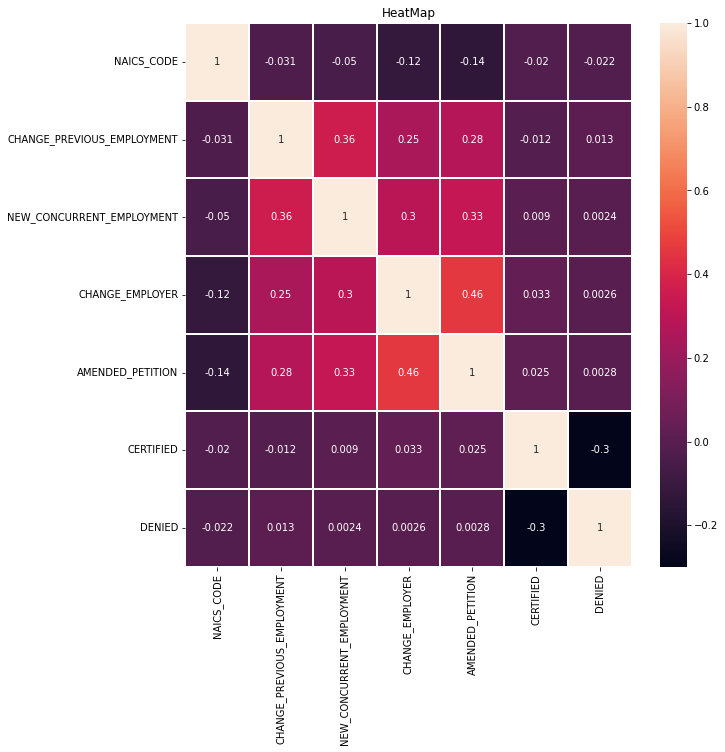

In [195]:
plt.figure(figsize=(10,10))
heat_map = sns.heatmap(modified_data.corr(), linewidth = 1 , annot = True)
plt.title( "HeatMap" )
plt.show()

Conclusion:

          After removing all the null values, value inserting, encoding part, feature extraction - We have more than 50 percent Ids that got the approval for H-1B visa. 